In [56]:
#CNN pour reconnaitre des fleurs : 

import numpy as np 
import tensorflow as tf 
import os 
import pandas as pd 
import cv2
import random as random 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [48]:
daisy_dir='Documents/X/PSC/Datasets/flowers/daisy'
sunflower_dir='Documents/X/PSC/Datasets/flowers/sunflower'
tulip_dir='Documents/X/PSC/Datasets/flowers/tulip'
dandi_dir='Documents/X/PSC/Datasets/flowers/dandelion'
rose_dir ='Documents/X/PSC/Datasets/flowers/rose'

In [49]:
IMG_SIZE= 150
predicters = []
target = []

In [50]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            predicters.append(np.array(image))
            target.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandi_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [00:02<00:00, 339.90it/s]


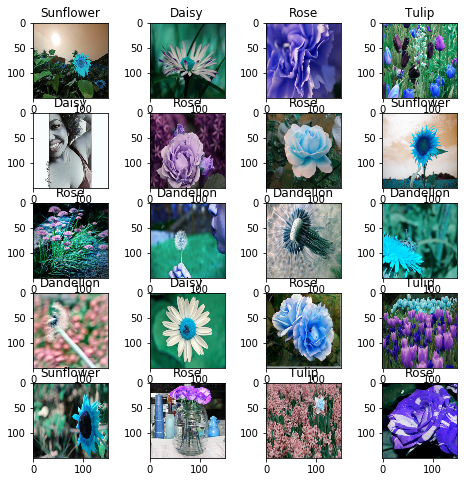

In [51]:
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1,columns*rows+1):
    index = np.random.randint(len(predicters))
    img = predicters[index]
    fig.add_subplot(rows,columns,i)
    plt.title(target[index])
    plt.imshow(img , cmap="gray")
plt.show()

In [52]:
encoder = LabelEncoder()

X = np.array(predicters)
X = X/255

y = encoder.fit_transform(target)
y = to_categorical(y,5)

print(X.shape)
print(y.shape)

(4323, 150, 150, 3)
(4323, 5)


In [53]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape

((2766, 150, 150, 3),
 (2766, 5),
 (865, 150, 150, 3),
 (865, 5),
 (692, 150, 150, 3),
 (692, 5))

In [54]:
batch_size = 64
epochs = 20
num_classes = y.shape[1]

In [57]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 38, 128)      

In [59]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [60]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [61]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size
                          )

Epoch 1/20
43/43 [==============================] - 288s 7s/step - loss: 1.8538 - accuracy: 0.4301 - val_loss: 2.8330 - val_accuracy: 0.2127
Epoch 2/20
43/43 [==============================] - 265s 6s/step - loss: 1.2208 - accuracy: 0.5355 - val_loss: 3.5440 - val_accuracy: 0.2127
Epoch 3/20
43/43 [==============================] - 263s 6s/step - loss: 1.1093 - accuracy: 0.5666 - val_loss: 5.0397 - val_accuracy: 0.2127
Epoch 4/20
43/43 [==============================] - 262s 6s/step - loss: 1.0592 - accuracy: 0.6021 - val_loss: 4.5654 - val_accuracy: 0.2127
Epoch 5/20
43/43 [==============================] - 266s 6s/step - loss: 1.0165 - accuracy: 0.6140 - val_loss: 3.6615 - val_accuracy: 0.2127
Epoch 6/20
43/43 [==============================] - 266s 6s/step - loss: 0.9566 - accuracy: 0.6341 - val_loss: 5.2903 - val_accuracy: 0.2127
Epoch 7/20
43/43 [==============================] - 261s 6s/step - loss: 0.9417 - accuracy: 0.6365 - val_loss: 3.4858 - val_accuracy: 0.2127
Epoch 8/20
43

In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

In [63]:
print("Loss=",test_eval[0])
print("Accuracy=",test_eval[1])

Loss= 0.719225553074324
Accuracy= 0.73554915


In [64]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)

y_true = np.argmax(y_test,axis = 1).astype(int)

In [65]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("Found %d correct flowers" %(corr_count))
print("Found %d incorrect flowers" %(incorr_count))

Found 509 correct flowers
Found 183 incorrect flowers


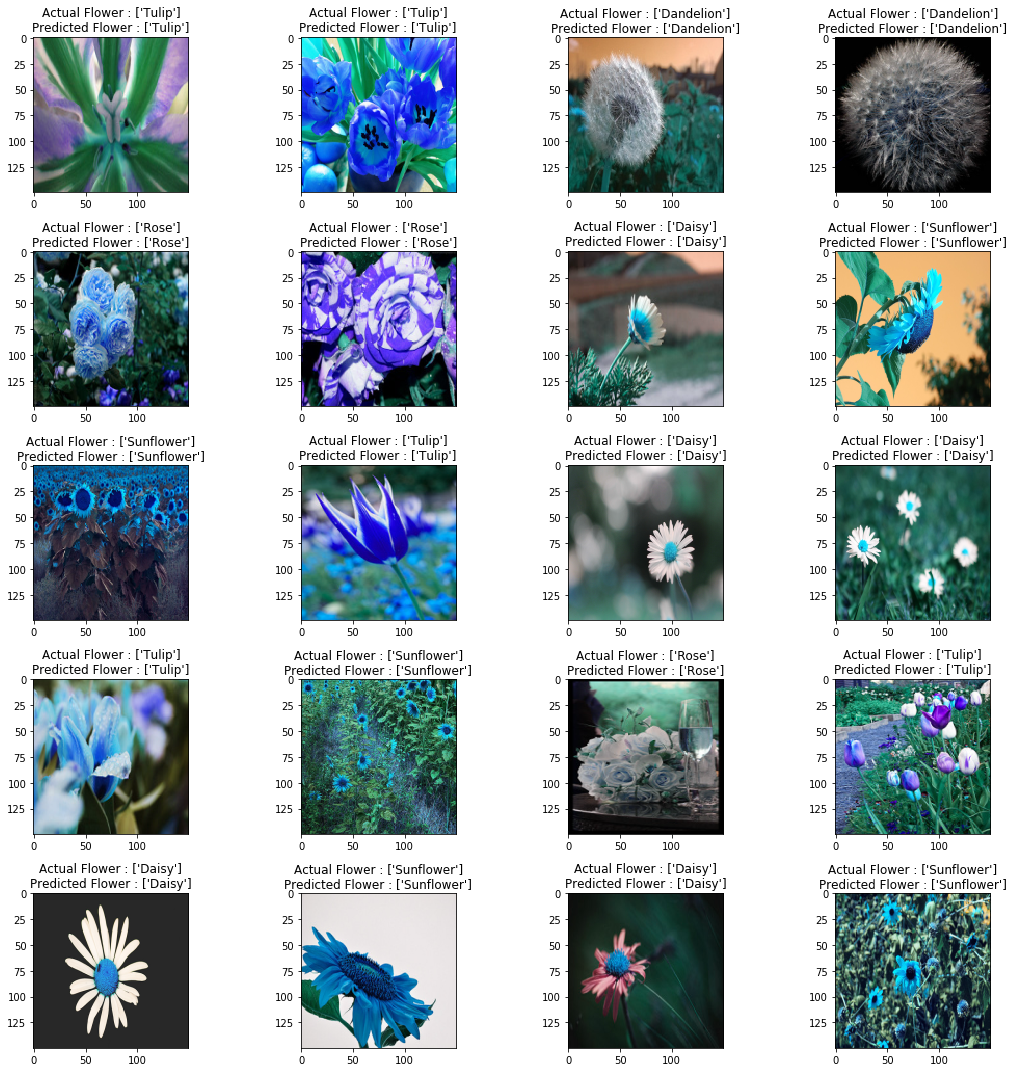

In [66]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)

count = 0
for i in range (num_classes):
    for j in range (4):
        
        ax[i,j].imshow(X_test[corr[count]])
        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[corr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[corr[count]]])))
        
        count+=1
        
plt.tight_layout()  